** Load the libraries

In [2]:
pip install mxnet gluoncv matplotlib

     |████████████████████████████████| 47.3 MB 201 kB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 47.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.2 MB 63.5 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 49.9 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 42.1 MB 60.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 45.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 54.4 MB/s eta 0:00:01
     |████████████████████████████████| 60.4 MB 52.7 MB/s eta 0:00:01     |████████████████████████████▏   | 53.1 MB 52.7 MB/s eta 0:00:01
     |████████████████████████████████| 661 kB 48.5 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 8.9 MB/s  eta 0:00:01
     |████████████████████████████████| 895 kB 82.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 84.9 MB/s eta 0:00:01
     |█████████████████████████

In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

download images

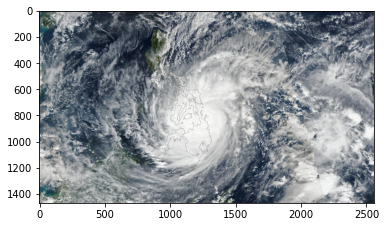

In [14]:
image1_url ='https://ftech-13f5c4.ingress-erytho.easywp.com/wp-content/uploads/2022/02/Super-Typhoon-Rai-Odette-2021-_-NASA...-scaled.jpg'
image2_url ='https://ftech-13f5c4.ingress-erytho.easywp.com/wp-content/uploads/2022/02/Holiday-Recovery-From-Typhoon-_Odette....png'
image3_url = 'https://ftech-13f5c4.ingress-erytho.easywp.com/wp-content/uploads/2022/02/Typhoon-_Odette_-_worst-ever_-for-Bohol....png' 
image4_url =  'https://ftech-13f5c4.ingress-erytho.easywp.com/wp-content/uploads/2022/02/Odette-damage-to-delay-Philippine....jpg'
image5_url =  'https://ftech-13f5c4.ingress-erytho.easywp.com/wp-content/uploads/2022/02/Odette-a-super-typhoon_-Not-quite_-says....jpg'
image6_url =  'https://ftech-13f5c4.ingress-erytho.easywp.com/wp-content/uploads/2022/02/Typhoon-Odette-leaves-50-dead-in-Bohol....jpeg'
image7_url =  'https://ftech-13f5c4.ingress-erytho.easywp.com/wp-content/uploads/2022/02/Bohol-Typhoon-Odette-Aftermath-Aerial....jpg'
image8_url =  'https://ftech-13f5c4.ingress-erytho.easywp.com/wp-content/uploads/2022/02/Typhoon-_Odette_-kills-six_-34_452....jpg'
image9_url =  'https://ftech-13f5c4.ingress-erytho.easywp.com/wp-content/uploads/2022/02/Typhoon-Odette-leaves-at-least-12-dead....jpg'

images_url= [image1_url, image2_url, image3_url, image4_url, image5_url,image6_url,image7_url,image9_url,image8_url]

images=[]

for i in range(len(images_url)):
    gcv.utils.download(url=images_url[i], path='imagedownload0'+str(i)) 
    images.append(mx.image.imread('imagedownload0'+str(i))) 
print('Image download completed.')


Image download completed.


Prepare the images for object identification

In [3]:
images_prepared=[]
for i in range(len(images)):
  images_prepared.append(gcv.data.transforms.presets.imagenet.transform_eval(images[i]))

4: Initialize pretrained neural and classify images

In [4]:
pretrainedNN = gcv.model_zoo.get_model('densenet201', pretrained=True)
top3classes=[]
for i in range(len(images_prepared)):
    top3classes.append(mx.nd.topk(mx.nd.softmax(pretrainedNN(images_prepared[i])), k=3)[0])

Picture 1
# 1 Detected object:  great white shark
# 2 Detected object:  gar
# 3 Detected object:  speedboat


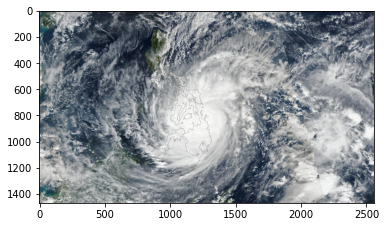

In [5]:
print('Picture 1')
plt.imshow(images[0].asnumpy())
for i in range(3):
    index=top3classes[0][i].astype('int').asscalar()
    label=pretrainedNN.classes[index]
    print('#',i+1, 'Detected object: ', label)